## Analisis de datos meteorológicos
#### Obtención de datos, AEMET, almacenados de forma independiente.
Se procede a desarrollar una metodología y flujo de procesos para recopilar datos de AEMET: Agencia Estatal de Meteorología - AEMET. Gobierno de España. Almacenaré la información de forma independiente en Mongo Atlas (NoSQL, Clúster en la nube). Con la finalidad de realizar un análisis y poner en práctica NIFI para realizar todas las tareas. Desde Jupyter, junto al lenguaje de programación Python, podremos realizar el analisis de la información recopilada.

##### Los siguientes DATOS fueron registrados y evaluados durante la DANA registrada en España (27/30 / 05/2023) | Jesús Blanco


#### INSTALACIÓN DE LIBRERIAS PYTHON, ANALISIS DE DATOS

In [1]:
!pip install pymongo
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


#### IMPORTACIÓN DE LIBRERIAS PYTHON, ANALISIS DE DATOS

In [34]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp
import random
from collections import defaultdict
from datetime import datetime
from pymongo import MongoClient

#### CONEXIÓN AL CLIENTE MONGODB (DATOS), BASE DE DATOS DE LA COLECCIÓN:

In [51]:
# Reemplaza <URI_de_conexión> con tu propio URI de conexión
client = MongoClient("mongodb+srv://<USER>:<PASSWORD>@bgpd.pbgm2ds.mongodb.net/?")

In [52]:
# Selecciona la base de datos
db = client['aemet_db']

# Selecciona la colección
collection = db['aemet_pred_28079_madrid']

In [53]:
# Extrae todos los documentos de la colección
documents = collection.find()

# Convierte los documentos a un DataFrame de Pandas para facilitar su análisis
df = pd.DataFrame(list(documents))

#### INTERPRETACIÓN DE LA INFORMACIÓN RECOPILADA (FORMATO JSON ANIDADO)

In [54]:
df.describe()

,_id,origen,elaborado,nombre,provincia,prediccion,id,version
count,60,60,60,60,60,60,60,60
unique,60,1,17,1,1,6,1,1
top,64707291379baf6cd7d15cb8,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-29T16:12:11,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '46', 'per...",28079,1.0
freq,1,60,16,60,60,19,60,60


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         60 non-null     object
 1   origen      60 non-null     object
 2   elaborado   60 non-null     object
 3   nombre      60 non-null     object
 4   provincia   60 non-null     object
 5   prediccion  60 non-null     object
 6   id          60 non-null     object
 7   version     60 non-null     object
dtypes: object(8)
memory usage: 3.9+ KB


In [56]:
df.head()

,_id,origen,elaborado,nombre,provincia,prediccion,id,version
0,64707291379baf6cd7d15cb8,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-26T07:19:47,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16n', 'pe...",28079,1.0
1,64707381379baf6cd7d15cb9,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-26T07:19:47,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16n', 'pe...",28079,1.0
2,64708393379baf6cd7d15cbb,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-26T09:45:07,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16n', 'pe...",28079,1.0
3,647087e7379baf6cd7d15cbd,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-26T09:49:06,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16n', 'pe...",28079,1.0
4,6470898b379baf6cd7d15cbe,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-26T09:59:04,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16n', 'pe...",28079,1.0


In [57]:
df.tail()

,_id,origen,elaborado,nombre,provincia,prediccion,id,version
55,6474df70e9849e47933d17ee,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-29T16:12:11,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16', 'per...",28079,1.0
56,6474e024e9849e47933d1806,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-29T16:12:11,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16', 'per...",28079,1.0
57,6474e0d8e9849e47933d181e,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-29T16:12:11,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16', 'per...",28079,1.0
58,6475fd1131c3e86f1d6bb309,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-30T12:33:07,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16', 'per...",28079,1.0
59,6475fdc531c3e86f1d6bb30b,{'productor': 'Agencia Estatal de Meteorolog�a...,2023-05-30T12:33:07,Madrid,Madrid,"{'dia': [{'estadoCielo': [{'value': '16', 'per...",28079,1.0


#### ITERACÍÓN DE DOCUMENTOS Y REGISTRO DE INFORMACIÓN EN DATAFRAMES

##### Resumen del pronóstico:
##### Ejemplo de información recopilada anidada en formato JSON e interpretación:

##### Fecha: 28 de mayo de 2023

Temperatura a las 00:00: 16°C
Temperatura a la 01:00: 15°C
Hora de salida del sol: 06:48
Hora de puesta del sol: 21:35


##### Fecha: 29 de mayo de 2023

Temperatura a las 00:00: 14°C
Temperatura a la 01:00: 17°C
Hora de salida del sol: 06:49
Hora de puesta del sol: 21:35

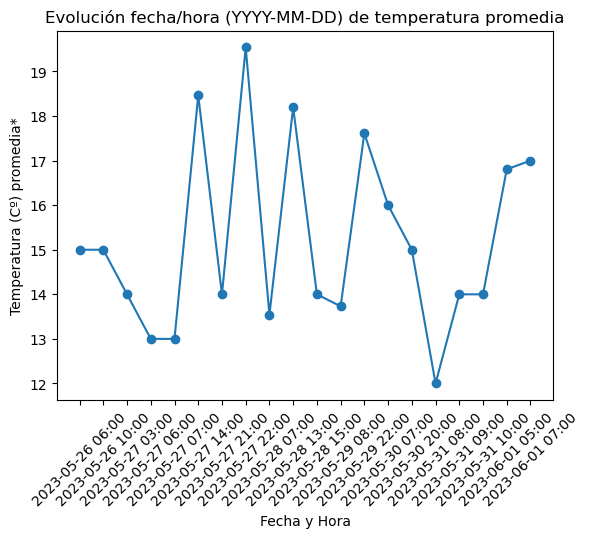

In [58]:
# Obtener los documentos de la colección
documentos = collection.find()

# Diccionario para almacenar los valores de temperatura por fecha y hora
valores_temperatura = defaultdict(list)

# Recorrer los documentos y obtener los datos de temperatura
for documento in documentos:
    dia = documento['prediccion']['dia']
    for info_dia in dia:
        fecha = info_dia['fecha'].split('T')[0]
        temperaturas = info_dia['temperatura']
        for temperatura in temperaturas:
            valor_temperatura = float(temperatura['value'])
            periodo = temperatura['periodo']
            hora = f'{int(periodo):02}:00'
            valores_temperatura[(fecha, hora)].append(valor_temperatura)

# Calcular el promedio de los valores de temperatura por fecha y hora
fechas_horas = sorted(valores_temperatura.keys())
promedios_temperatura = [sum(valores_temperatura[key]) / len(valores_temperatura[key]) for key in fechas_horas]

# Reducir la cantidad de fechas y horas
num_muestras = 20  # Número deseado de muestras
indices_muestra = random.sample(range(len(fechas_horas)), num_muestras)
fechas_horas_muestra = sorted([fechas_horas[i] for i in indices_muestra])
promedios_temperatura_muestra = [promedios_temperatura[i] for i in indices_muestra]

# Obtener las fechas y horas para la muestra
fechas_muestra, horas_muestra = zip(*fechas_horas_muestra)

# Configurar la figura y los ejes
fig, ax = plt.subplots()

# Graficar los datos
ax.plot([f'{fecha} {hora}' for fecha, hora in zip(fechas_muestra, horas_muestra)], promedios_temperatura_muestra, marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Temperatura (Cº) promedia*')

# Título del gráfico
ax.set_title('Evolución fecha/hora (YYYY-MM-DD) de temperatura promedia')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

#### Datos obtenidos de la colección: AEMET Actuales (Prediciones Reales).

In [59]:
# Reemplaza <URI_de_conexión> con tu propio URI de conexión
client = MongoClient("mongodb+srv://<USER>:<PASSWORD>@bgpd.pbgm2ds.mongodb.net/?")

# Selecciona la base de datos
db = client['aemet_db']

#Cargar colección:
collection = db['aemet_actual_3195_madrid_retiro']
documents = collection.find()

# Convierte los documentos a un DataFrame de Pandas para facilitar su análisis
df2 = pd.DataFrame(list(documents))

#### DATOS FILTRADOS EN UN NUEVO DATAFRAME /COLUMNA

In [60]:
df2['fint'] = pd.to_datetime(df2['fint'])

columns_to_exclude = ['idema', 'lon', 'alt', 'ubi', 'pres_nmar', 'tamin', 'tpr', 'rviento', 'dmax', 'lat', 'vmax']
columns_to_exclude = [col for col in columns_to_exclude if col in df2.columns]

df_excluded = df2.drop(columns_to_exclude, axis=1)

df_avg = df_excluded.groupby('fint').mean()

print(df_avg)

                     prec   vv     dv   pres    hr    ta  tamax
fint                                                           
2023-05-22 15:00:00   0.0  3.1   96.0  934.0  27.0  22.3   22.9
2023-05-22 16:00:00   0.0  2.4  101.0  934.0  27.0  21.8   22.3
2023-05-22 17:00:00   0.0  3.9  128.0  934.1  39.0  20.4   21.9
2023-05-22 18:00:00   0.0  4.0  133.0  934.4  39.0  20.1   20.5
2023-05-22 19:00:00   0.0  1.0  127.0  934.8  43.0  19.4   20.0
...                   ...  ...    ...    ...   ...   ...    ...
2023-05-30 09:00:00   0.0  1.6   97.0  939.7  73.0  17.9   17.9
2023-05-30 10:00:00   0.0  1.0   70.0  939.8  66.0  19.9   19.9
2023-05-30 11:00:00   0.0  1.7  138.0  939.7  58.0  22.0   22.0
2023-05-30 12:00:00   0.0  0.6  352.0  939.2  58.0  20.0   22.3
2023-05-30 13:00:00   0.0  1.7  193.0  938.7  50.0  22.7   23.2

[147 rows x 7 columns]


#### Precipitación registrada real. Comprobación de datos anexados.

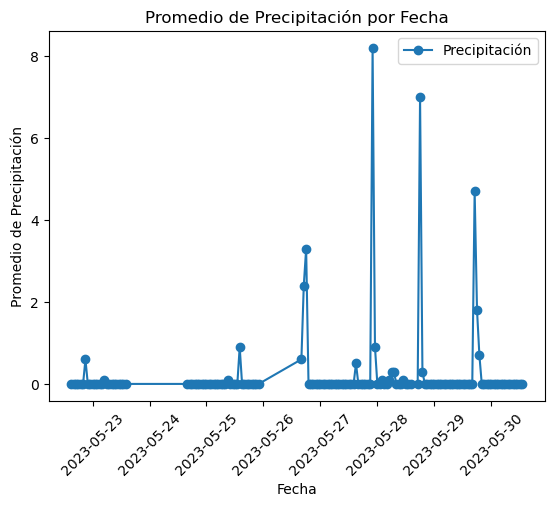

In [61]:
#Crear gráfico de línea para la columna 'prec'
plt.plot(df_avg.index, df_avg['prec'], marker='o', linestyle='-', label='Precipitación')

#Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Promedio de Precipitación')
plt.title('Promedio de Precipitación por Fecha')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

#### DATOS: TEMPERATURA REGISTRADOS, REALES.

In [69]:
# Crear un gráfico de línea interactiva con la temperatura promedio
fig = go.Figure(data=go.Scatter(x=df_avg.index, y=df_avg['ta'], mode='lines+markers'))

# Configurar etiquetas y título del gráfico
fig.update_layout(xaxis_title='Fecha', yaxis_title='Temperatura Promedia (°C)', title='Temperatura Promedio por Fecha REAL')

# Rotar las etiquetas del eje x para mejorar la legibilidad
fig.update_layout(xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()

#### DATOS: TEMPERATURA REGISTRADOS, PREDICCIÓN.

In [66]:
# Aumentar muestrar dedicadas a la cantidad de fechas y horas
num_muestras = 70  # Número deseado de muestras
indices_muestra = random.sample(range(len(fechas_horas)), num_muestras)
fechas_horas_muestra = sorted([fechas_horas[i] for i in indices_muestra])
promedios_temperatura_muestra = [promedios_temperatura[i] for i in indices_muestra]

# Obtener las fechas y horas para la muestra
fechas_muestra, horas_muestra = zip(*fechas_horas_muestra)


# Crear la figura y agregar los datos
fig = go.Figure(data=go.Scatter(x=[f'{fecha} {hora}' for fecha, hora in zip(fechas_muestra, horas_muestra)],
                               y=promedios_temperatura_muestra,
                               mode='markers+lines'))

# Configurar las etiquetas de los ejes
fig.update_xaxes(title='Fecha y Hora')
fig.update_yaxes(title='Temperatura (Cº) promedio')

# Configurar el título del gráfico
fig.update_layout(title='Evolución fecha/hora (YYYY-MM-DD) de temperatura PREDECIDA PROMEDIA')

# Mostrar la gráfica
fig.show()

#### Comparación de predicción meteo y toma de datos reales registrados.
Podemos observar un fenomeno en la gráfica respecto a los picos de temperaturas y descenso en picado de las mismas debido a la variedad de datos registrados en el promedio que ofrecen sus respectivas horas.

In [70]:
# Crear un gráfico de línea interactiva con la temperatura promedio
fig = go.Figure(
    data=go.Scatter(
        x=df_avg.index, 
        y=df_avg['ta'], 
        mode='lines+markers',
        name='Temperatura registrada real'
    )
)

# Aumentar muestrar dedicadas a la cantidad de fechas y horas
num_muestras = 70  # Número deseado de muestras
indices_muestra = random.sample(range(len(fechas_horas)), num_muestras)
fechas_horas_muestra = sorted([fechas_horas[i] for i in indices_muestra])
promedios_temperatura_muestra = [promedios_temperatura[i] for i in indices_muestra]

# Obtener las fechas y horas para la muestra
fechas_muestra, horas_muestra = zip(*fechas_horas_muestra)


# Agregar los datos de la evolución de temperatura promedio por fecha y hora
fig.add_trace(
    go.Scatter(
        x=[f'{fecha} {hora}' for fecha, hora in zip(fechas_muestra, horas_muestra)],
        y=promedios_temperatura_muestra,
        mode='markers+lines',
        name='Temperatura predecida'
    )
)

# Configurar etiquetas y título del gráfico
fig.update_layout(
    xaxis_title='Fecha y Hora', 
    yaxis_title='Temperatura (Cº) promedio', 
    title='Comparación y evaluación de las temperaturas registrada (Reales/Predecidas)'
)

# Rotar las etiquetas del eje x para mejorar la legibilidad
fig.update_layout(xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()

#### Gráfica datos registrados, predecidos y precipitación registrada

In [65]:
# Crear subtramas
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Agregar los datos de la temperatura registrada real en la primera subtrama
fig.add_trace(
    go.Scatter(
        x=df_avg.index,
        y=df_avg['ta'],
        mode='lines+markers',
        name='Temperatura registrada real'
    ),
    row=1, col=1
)

# Aumentar muestrar dedicadas a la cantidad de fechas y horas
num_muestras = 70  # Número deseado de muestras
indices_muestra = random.sample(range(len(fechas_horas)), num_muestras)
fechas_horas_muestra = sorted([fechas_horas[i] for i in indices_muestra])
promedios_temperatura_muestra = [promedios_temperatura[i] for i in indices_muestra]

# Obtener las fechas y horas para la muestra
fechas_muestra, horas_muestra = zip(*fechas_horas_muestra)
# Agregar los datos de la evolución de temperatura promedio por fecha y hora en la primera subtrama
fig.add_trace(
    go.Scatter(
        x=[f'{fecha} {hora}' for fecha, hora in zip(fechas_muestra, horas_muestra)],
        y=promedios_temperatura_muestra,
        mode='markers+lines',
        name='Temperatura predecida'
    ),
    row=1, col=1
)

# Agregar los datos de la precipitación de lluvia en la segunda subtrama
fig.add_trace(
    go.Scatter(
        x=df_avg.index,
        y=df_avg['prec'],
        mode='markers+lines',
        name='Precipitación de lluvia'
    ),
    row=2, col=1
)

# Configurar etiquetas y título del gráfico
fig.update_layout(
    xaxis_title='Fecha y Hora',
    title='Evolución de Temperatura Predecida promedia/real y Precipitación de Lluvia(real)'
)

# Configurar las etiquetas de los ejes y la leyenda en cada subtrama
fig.update_yaxes(title_text='Temperatura (Cº)', row=1, col=1)
fig.update_yaxes(title_text='Precipitación', row=2, col=1)

# Rotar las etiquetas del eje x para mejorar la legibilidad
fig.update_layout(xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()

#### CONCLUSIONES:
Podemos apreciar que la precipitación actua durante el periodo de tiempo registrado en los valores de temperatura mas bajos actuando sobre si misma como datos en los que mayor precipitación de lluvia real ha sido registrada.